In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [2]:
csv = pd.read_csv(r"C:\Users\stanx\Desktop\Credit Card Fraud Detection ML\creditcard_2023.csv")
df = pd.DataFrame(csv)

df = df.sample(10000, replace=False)


train_credit, test_credit = train_test_split(df, test_size=.25,)

train_credit

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99555,305967,0.387473,0.109376,-0.262353,0.483185,0.008043,-0.345789,-0.098452,-0.038840,-0.480564,...,0.027921,-0.434776,-0.162564,-0.108468,1.056170,0.392367,0.454778,0.651803,8522.86,1
88160,294572,0.343117,-0.345449,0.275158,0.377886,0.924681,0.163229,0.592367,-0.210580,-0.248012,...,0.021617,0.913603,0.134129,1.384576,-1.393628,3.849996,-0.492413,0.038812,13008.21,1
68595,275007,-1.018521,1.026492,-0.295783,-1.903768,0.179148,-0.203815,0.951650,-0.226652,5.916031,...,-0.403253,0.777704,0.028517,1.204962,0.459954,-0.993312,1.061984,-1.650869,18626.84,0
96424,302836,-0.818657,0.070711,-0.414921,0.307818,-0.129606,-0.650022,-0.379759,-0.228899,0.481430,...,0.190074,0.143117,-0.237852,0.236262,0.130453,-1.517937,-1.166152,2.217944,15370.79,1
131619,338031,-1.899558,1.805976,-2.117657,2.347504,-1.693572,-1.066547,-2.117315,0.118065,-1.919388,...,-1.130244,0.958971,1.223239,-1.701032,-0.210689,1.372828,3.028806,-3.556698,22284.89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35943,242355,-0.135550,-0.682147,1.934042,-1.703020,-0.050842,0.753340,0.418984,-0.076149,-0.052625,...,0.010008,0.258200,0.099160,1.566072,0.438262,-0.486026,-0.249250,0.085071,9429.46,0
104190,310602,-1.536895,1.289629,-1.785744,1.732998,-1.838059,-1.789041,-1.781227,1.159023,-1.462599,...,0.502710,0.870315,-0.572459,0.484981,-0.200845,0.944409,-1.047496,-2.061784,8984.08,1
63528,269940,1.764343,-0.749509,0.289166,-0.869673,-0.036665,0.379898,0.188522,-0.149633,0.456239,...,-0.316592,-0.831379,0.371712,-0.818296,-0.806964,-2.607080,-0.144166,-0.176303,18324.89,0
138138,344550,-0.044329,0.908619,-1.038439,1.537073,0.206306,-1.224047,-0.352922,0.189078,-1.339374,...,0.122708,-0.558077,0.003544,-1.354678,-0.096775,1.128742,0.591901,0.338595,7452.13,1


In [3]:
onlyFraud = df[df['Class'] == 1]
onlyFraud
onlyFraud.sort_values('Amount', ascending=False)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
84114,290526,-0.665926,0.327215,-0.171917,0.455445,-0.270721,-0.019217,-0.288086,-0.270373,-0.345295,...,0.495607,-0.468293,-0.291332,0.329861,-0.060991,-0.953561,-1.115216,-1.697330,24038.12,1
124563,330975,-0.285979,0.471503,-0.695250,0.991725,-0.000749,0.411463,-0.163439,0.212417,-0.558627,...,0.107759,-0.153847,0.160891,-0.515606,-0.012450,0.298660,0.715656,0.557308,24035.03,1
88223,294635,-0.748131,1.069007,-1.142065,1.652664,-0.868165,-1.791486,-1.154639,0.424377,-1.631071,...,0.638143,0.039288,-0.090546,0.829138,0.449128,0.238859,2.559442,2.291920,24032.16,1
90824,297236,-0.984683,0.732336,-1.103044,1.673277,-1.148747,-1.535349,-1.493083,0.759441,-1.852113,...,0.759436,0.767419,-0.638251,1.107054,-1.150751,0.689501,2.981740,1.014898,24029.86,1
84372,290784,-0.773508,0.105053,-0.304777,0.190596,-0.166600,-0.622234,-0.363925,-0.320574,0.358213,...,0.277720,-0.211536,-0.417469,0.049377,0.136917,-0.854104,-0.901679,0.641231,24026.61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148150,354562,-0.462772,-0.258019,-0.430586,0.215861,-0.709369,0.765807,0.455795,0.064085,-0.556191,...,0.270021,0.338026,1.538259,0.083124,-0.848339,1.075368,0.383621,0.616453,60.27,1
127418,333830,0.042190,-0.333275,1.847125,-1.278891,0.039699,0.048906,0.461832,-0.155947,1.263796,...,-0.038544,0.768626,-0.225108,0.947370,0.248033,-1.219766,-0.023613,-0.011283,58.63,1
123283,329695,1.604673,-0.032129,-0.128476,0.728428,0.824412,0.079658,0.620860,-0.177095,-0.237223,...,-0.202887,-0.612825,0.160504,-0.327458,-0.222642,-0.419934,-0.240545,-0.053399,55.50,1
116368,322780,-0.593395,-0.218632,-0.012210,-0.098183,-0.129322,0.358360,0.012689,-0.192138,0.447846,...,0.025467,0.502012,0.073674,-0.850041,-0.309934,2.204972,-1.396590,1.828497,51.54,1


Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

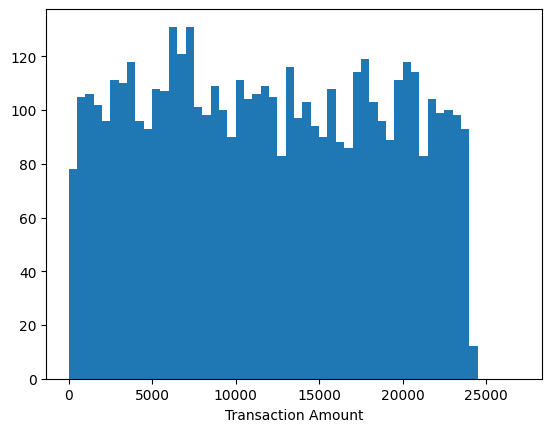

In [4]:
plt.hist(onlyFraud.loc[:, 'Amount'], bins = np.arange(0, 27500, 500) )
plt.xlabel('Transaction Amount')
train_credit.columns

In [5]:
neighbor = KNeighborsClassifier(n_neighbors=3)
x = train_credit.loc[:, ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28')]

y = train_credit.loc[:, 'Class']
neighbor.fit(x, y)
train_pred = neighbor.predict(x)
train_credit.loc[:, 'Prediction'] = train_pred
train_credit

#accuracy of training predictions
train_accuracy = np.sum(np.count_nonzero(train_credit.loc[:, 'Class'] == train_credit.loc[:, 'Prediction'])) / len(train_credit) * 100
train_accuracy

np.float64(99.77333333333334)

In [6]:
#predicitng test set
test_values = test_credit.loc[:, ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28')]



test_pred = neighbor.predict(test_values)
test_credit.loc[:, 'Prediction'] =  test_pred
test_credit

#accuracy of test prediction
test_accuracy = np.sum(np.count_nonzero(test_credit.loc[:, 'Class'] == test_credit.loc[:, 'Prediction'])) / len(test_credit) * 100
test_accuracy


np.float64(99.24)

In [7]:
#Finding best accuracy 
def best_test_accuracy(k):
    neighbor = KNeighborsClassifier(n_neighbors=k)
    neighbor.fit(x, y)
    test_values = test_credit.loc[:, ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28')]



    test_pred = neighbor.predict(test_values)
    test_credit.loc[:, 'Prediction'] =  test_pred
    test_credit

    #accuracy of test predictions
    test_accuracy = np.sum(np.count_nonzero(test_credit.loc[:, 'Class'] == test_credit.loc[:, 'Prediction'])) / len(test_credit) * 100
    return test_accuracy


accuracy_per_k = np.array([])
for i in np.arange(3, 251, 4):
    accuracy_per_k = np.append(accuracy_per_k, best_test_accuracy(i))

np.float64(99.24)

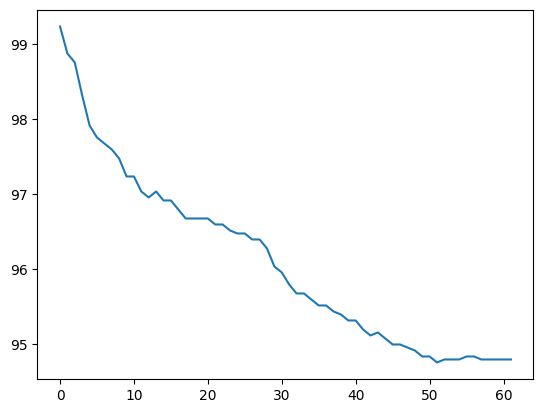

In [8]:
#finding most accuraate value (k=3)
plt.plot(accuracy_per_k)
maximum_accuracy = np.max(accuracy_per_k)
accuracy_per_k == maximum_accuracy

best_test_accuracy(3)